__Importing required libraries__

In [1]:
import pandas  as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import datetime
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.impute import KNNImputer
import seaborn as sns
%matplotlib inline

plt.rcParams['figure.figsize'] = [13,5]
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'
plt.style.use('seaborn-whitegrid')

__Importing 'cars' dataset. Data Source - /kaggle/input/vehicle-dataset-from-cardekho/Car details v3.csv__

In [85]:
cars = pd.read_csv(r'C:\Prasanna\Udacity\Udacity_Proj_1\Car details v3.csv',encoding="utf-8-sig")

__Exploratory Data Analysis__

In [3]:
#Lets see how our data looks like
cars.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage (kmpl),engine (CC),max_power (bhp)
0,Ambassador CLASSIC 1500 DSL AC,2000,75000,90000,Diesel,Individual,Manual,Second,12.80,1489.0,35.5
1,Ambassador Classic 2000 DSZ AC PS,1994,99000,100000,Diesel,Individual,Manual,Second,12.80,1995.0,52.0
2,Ambassador Grand 1500 DSZ BSIII,2008,122000,60000,Diesel,Individual,Manual,Second,12.80,1995.0,52.0
3,Ambassador Grand 2000 DSZ PW CL,2008,200000,80000,Diesel,Individual,Manual,Third,13.50,1995.0,52.0
4,Audi A3 35 TDI Premium Plus,2017,2600000,70000,Diesel,Individual,Automatic,First,20.38,1968.0,143.0


In [4]:
#Lets see number of rows & columns in the data set
cars.shape

(6440, 11)

_There are 6440 rows and 11 columns in the data set_

In [5]:
#What are the data types of the variables
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6440 entries, 0 to 6439
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             6440 non-null   object 
 1   year             6440 non-null   int64  
 2   selling_price    6440 non-null   int64  
 3   km_driven        6440 non-null   int64  
 4   fuel             6440 non-null   object 
 5   seller_type      6440 non-null   object 
 6   transmission     6440 non-null   object 
 7   owner            6440 non-null   object 
 8   mileage (kmpl)   6254 non-null   float64
 9   engine (CC)      6254 non-null   float64
 10  max_power (bhp)  6254 non-null   float64
dtypes: float64(3), int64(3), object(5)
memory usage: 553.6+ KB


In [6]:
#Summary Statistics of the dataset
cars.describe()

,year,selling_price,km_driven,mileage (kmpl),engine (CC),max_power (bhp)
count,6440.000000,6.440000e+03,6.440000e+03,6254.000000,6254.000000,6254.000000
mean,2013.975932,6.183310e+05,6.424055e+04,20.370208,1315.939878,88.489193
std,3.921763,8.339014e+05,5.192954e+04,3.581534,343.327714,33.766608
min,1994.000000,3.000000e+04,1.000000e+00,0.000000,793.000000,32.800000
25%,2011.000000,2.500000e+05,3.000000e+04,18.120000,1194.000000,68.000000
50%,2015.000000,4.099990e+05,6.000000e+04,20.300000,1248.000000,81.800000
75%,2017.000000,6.400000e+05,9.000000e+04,22.770000,1493.000000,97.700000
max,2020.000000,6.523000e+06,2.360457e+06,33.000000,3604.000000,282.000000


_Since the data is gradually increasing from min to max, i do not see any outliers in the data_

_Looking at the count statistic above: 
mileage (kmpl), engine (CC) and max_power (bhp) seems to have 186 (2.9%) missing values._

__Data Preparation__<br>
1. Since 'name' of the car model is not of much use, we will drop that column<br>
2. 'Year' variable doesnt make much sense, instead we will convert the same to "age of the car"<br>
3. Drop 'Year' variable too<br>

In [88]:
# Converting current year to int and then subtracting 'year' so that both are in same data type
today = str(datetime.date.today())
CurrentYear = int(today[:4])
cars['age'] = CurrentYear - cars['year']

In [89]:
cars = cars.drop(['year','name'], axis=1)

In [90]:
cars.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage (kmpl),engine (CC),max_power (bhp),age
0,75000,90000,Diesel,Individual,Manual,Second,12.80,1489.0,35.5,20
1,99000,100000,Diesel,Individual,Manual,Second,12.80,1995.0,52.0,26
2,122000,60000,Diesel,Individual,Manual,Second,12.80,1995.0,52.0,12
3,200000,80000,Diesel,Individual,Manual,Third,13.50,1995.0,52.0,12
4,2600000,70000,Diesel,Individual,Automatic,First,20.38,1968.0,143.0,3


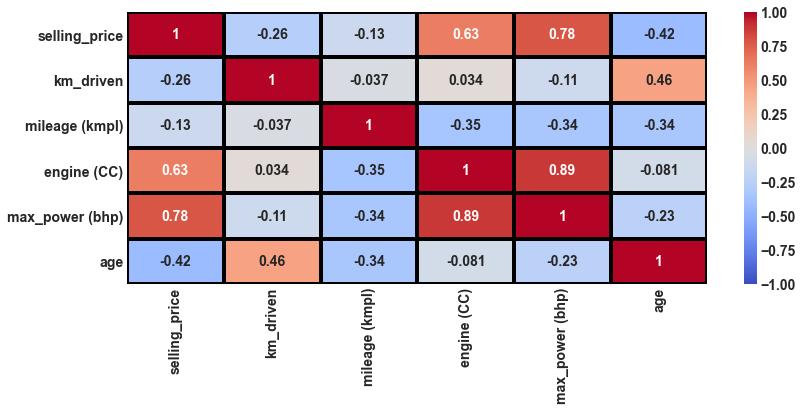

In [91]:
#Heatmap
sns.heatmap(cars.corr(), annot = True, vmin = -1, vmax = 1, cmap = 'coolwarm', lw = 3, linecolor = 'black')

__Question 1__ - When is the best time to sell the car?

1. 51% of the cars are sold during 1 to 5 years of the 'age' of the car. <br>
2. Selling price of car is highest within 1 year of age, similar selling price during age of 2 & 3 years and then gradually decreases.<br>
3. As age of the car increases, selling price decreases, shows a moderate negative correlation between both variables.<br>
4. All car fuel types (Diesel, Petrol, CNG, LPG) follow a similar trend, however Diesel cars have higher selling price

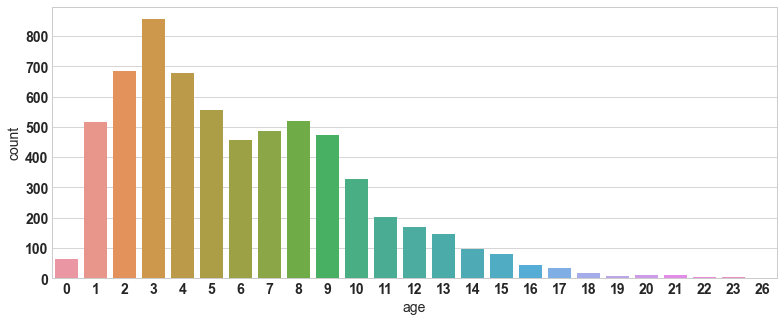

In [92]:
# Age of cars when they are sold
sns.countplot(x='age',  data = cars)

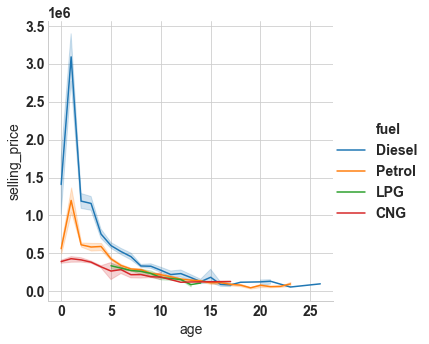

In [93]:
# How does age vs selling price vary by different car fuel types
sns.relplot(x='age', y='selling_price', hue = 'fuel', kind="line", data=cars)

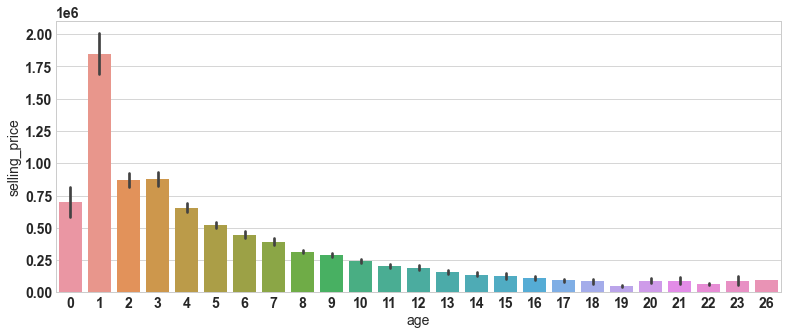

In [94]:
# Selling price vs age of car
sns.barplot('age','selling_price',data=cars)

__Question 2 - Is the selling price better when car is sold by owner/seller type?__

1. 91% of the cars sold are by first or second owner<br>

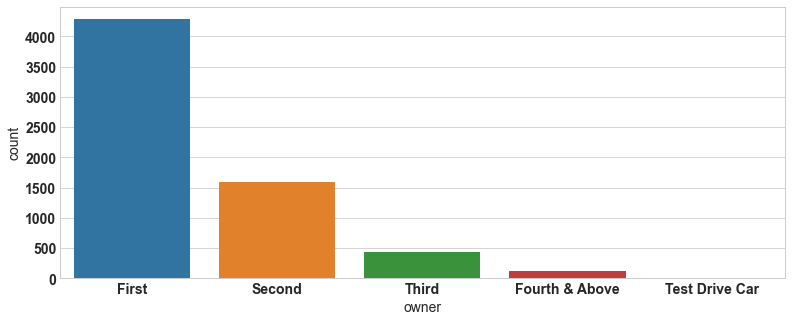

In [95]:
sns.countplot('owner', data = cars, order = cars['owner'].value_counts().index)

In [135]:
cars[cars['owner'].isin(['First', 'Second'])]['owner']

0       Second
1       Second
2       Second
4        First
5        First
         ...  
6435     First
6436     First
6437     First
6438     First
6439     First
Name: owner, Length: 5875, dtype: object

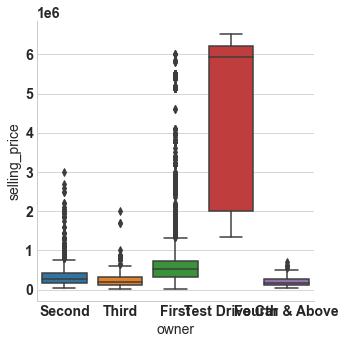

In [142]:
sns.catplot(x='owner',y='selling_price', kind = 'box', data = cars)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

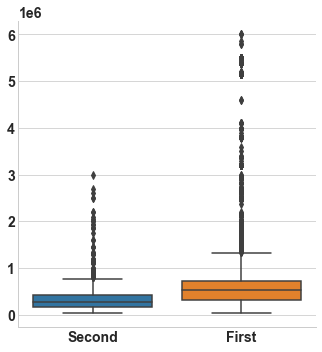

In [146]:
sns.catplot(x=cars[(cars['owner'] == 'First') | (cars['owner'] == 'Second')]['owner'],y='selling_price', kind = 'box', data = cars)